In [1]:
import pandas as pd
import numpy as np

In [22]:
# open each csv file and read it into a pandas dataframe

name_of_variables = pd.read_csv('/Users/fabienaugsburger/Documents/GitHub/master-project/datasets/variable_list_24_v2_1.csv')

for i in range(0, len(name_of_variables)):

    print(name_of_variables.iloc[i, 0])

    locals()[f'max_{name_of_variables.iloc[i, 0]}'] = pd.DataFrame()
    locals()[f'min_{name_of_variables.iloc[i, 0]}'] = pd.DataFrame()
    locals()[f'mean_{name_of_variables.iloc[i, 0]}'] = pd.DataFrame()
    locals()[f'sigma_{name_of_variables.iloc[i, 0]}'] = pd.DataFrame()

    for j in range (1,96+1):
        if name_of_variables.iloc[i, 0] == 'geopotential':
            for k in [500, 1000]:
                df_max_temp = pd.read_csv('/Users/fabienaugsburger/Documents/GitHub/master-project/datasets_3h/' + name_of_variables.iloc[i, 0] + '/storm_' + str(j) + '/max_'+ str(j) + '_' + str(k) + '.csv')
                df_min_temp = pd.read_csv('/Users/fabienaugsburger/Documents/GitHub/master-project/datasets_3h/' + name_of_variables.iloc[i, 0] + '/storm_' + str(j) + '/min_'+ str(j) + '_' + str(k) + '.csv')
                df_mean_temp = pd.read_csv('/Users/fabienaugsburger/Documents/GitHub/master-project/datasets_3h/' + name_of_variables.iloc[i, 0] + '/storm_' + str(j) + '/mean_'+ str(j) + '_' + str(k) + '.csv')
                df_sigma_temp = pd.read_csv('/Users/fabienaugsburger/Documents/GitHub/master-project/datasets_3h/' + name_of_variables.iloc[i, 0] + '/storm_' + str(j) + '/std_'+ str(j) + '_' + str(k) + '.csv')
        else:
            df_max_temp = pd.read_csv('/Users/fabienaugsburger/Documents/GitHub/master-project/datasets_3h/' + name_of_variables.iloc[i, 0] + '/storm_' + str(j) + '/max_'+ str(j) + '_0.csv')
            df_min_temp = pd.read_csv('/Users/fabienaugsburger/Documents/GitHub/master-project/datasets_3h/' + name_of_variables.iloc[i, 0] + '/storm_' + str(j) + '/min_'+ str(j) + '_0.csv')
            df_mean_temp = pd.read_csv('/Users/fabienaugsburger/Documents/GitHub/master-project/datasets_3h/' + name_of_variables.iloc[i, 0] + '/storm_' + str(j) + '/mean_'+ str(j) + '_0.csv')
            df_sigma_temp = pd.read_csv('/Users/fabienaugsburger/Documents/GitHub/master-project/datasets_3h/' + name_of_variables.iloc[i, 0] + '/storm_' + str(j) + '/std_'+ str(j) + '_0.csv')

        df_max_temp = df_max_temp.drop(columns = ['Unnamed: 0'])
        df_min_temp = df_min_temp.drop(columns = ['Unnamed: 0'])
        df_mean_temp = df_mean_temp.drop(columns = ['Unnamed: 0'])
        df_sigma_temp = df_sigma_temp.drop(columns = ['Unnamed: 0'])

        locals()[f'max_{name_of_variables.iloc[i, 0]}'] = pd.concat([locals()[f'max_{name_of_variables.iloc[i, 0]}'], df_max_temp], axis=0)
        locals()[f'min_{name_of_variables.iloc[i, 0]}'] = pd.concat([locals()[f'min_{name_of_variables.iloc[i, 0]}'], df_min_temp], axis=0)
        locals()[f'mean_{name_of_variables.iloc[i, 0]}'] = pd.concat([locals()[f'mean_{name_of_variables.iloc[i, 0]}'], df_mean_temp], axis=0)
        locals()[f'sigma_{name_of_variables.iloc[i, 0]}'] = pd.concat([locals()[f'sigma_{name_of_variables.iloc[i, 0]}'], df_sigma_temp], axis=0)

10m_u_component_of_wind
10m_v_component_of_wind
2m_dewpoint_temperature
2m_temperature
cloud_base_height
convective_available_potential_energy
convective_inhibition
convective_precipitation
convective_rain_rate
convective_snowfall
geopotential
high_cloud_cover
instantaneous_10m_wind_gust
k_index
large_scale_precipitation
large_scale_snowfall
mean_large_scale_precipitation_rate
mean_top_net_long_wave_radiation_flux
mean_top_net_short_wave_radiation_flux
mean_total_precipitation_rate
mean_sea_level_pressure
mean_surface_latent_heat_flux
mean_surface_net_long_wave_radiation_flux
mean_surface_net_short_wave_radiation_flux
mean_vertically_integrated_moisture_divergence
surface_pressure
total_precipitation
total_totals_index


In [20]:
name_of_variables.iloc[10,0]

'geopotential'

In [27]:
# drop nan values 
for i in range (0, len(name_of_variables)):
    locals()[f'max_{name_of_variables.iloc[i, 0]}'] = locals()[f'max_{name_of_variables.iloc[i, 0]}'].dropna()
    locals()[f'min_{name_of_variables.iloc[i, 0]}'] = locals()[f'min_{name_of_variables.iloc[i, 0]}'].dropna()
    locals()[f'mean_{name_of_variables.iloc[i, 0]}'] = locals()[f'mean_{name_of_variables.iloc[i, 0]}'].dropna()
    locals()[f'sigma_{name_of_variables.iloc[i, 0]}'] = locals()[f'sigma_{name_of_variables.iloc[i, 0]}'].dropna()

AttributeError: 'numpy.ndarray' object has no attribute 'dropna'

In [28]:
# remove variable with only one repetitive value in each statistic
for i in range (0, len(name_of_variables)):
    if len(locals()[f'max_{name_of_variables.iloc[i, 0]}'].columns) == 1:
        locals()[f'max_{name_of_variables.iloc[i, 0]}'] = locals()[f'max_{name_of_variables.iloc[i, 0]}'].drop(columns = locals()[f'max_{name_of_variables.iloc[i, 0]}'].columns[0])
    if len(locals()[f'min_{name_of_variables.iloc[i, 0]}'].columns) == 1:
        locals()[f'min_{name_of_variables.iloc[i, 0]}'] = locals()[f'min_{name_of_variables.iloc[i, 0]}'].drop(columns = locals()[f'min_{name_of_variables.iloc[i, 0]}'].columns[0])
    if len(locals()[f'mean_{name_of_variables.iloc[i, 0]}'].columns) == 1:
        locals()[f'mean_{name_of_variables.iloc[i, 0]}'] = locals()[f'mean_{name_of_variables.iloc[i, 0]}'].drop(columns = locals()[f'mean_{name_of_variables.iloc[i, 0]}'].columns[0])
    if len(locals()[f'sigma_{name_of_variables.iloc[i, 0]}'].columns) == 1:
        locals()[f'sigma_{name_of_variables.iloc[i, 0]}'] = locals()[f'sigma_{name_of_variables.iloc[i, 0]}'].drop(columns = locals()[f'sigma_{name_of_variables.iloc[i, 0]}'].columns[0])

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

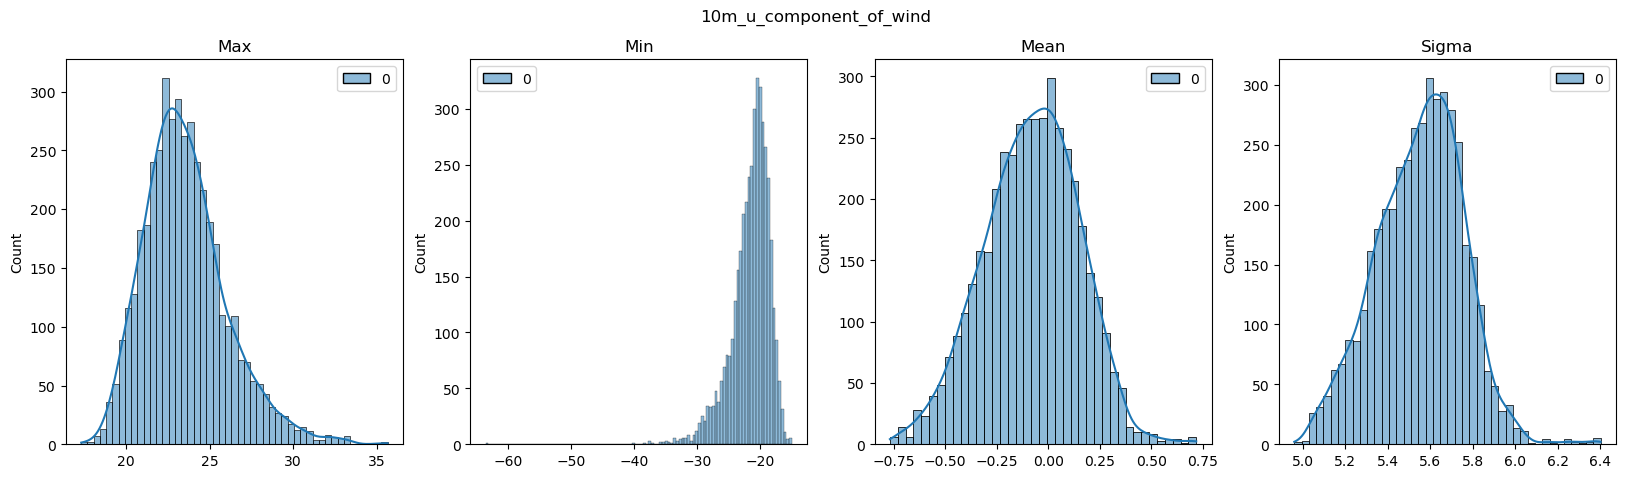

10m_u_component_of_wind


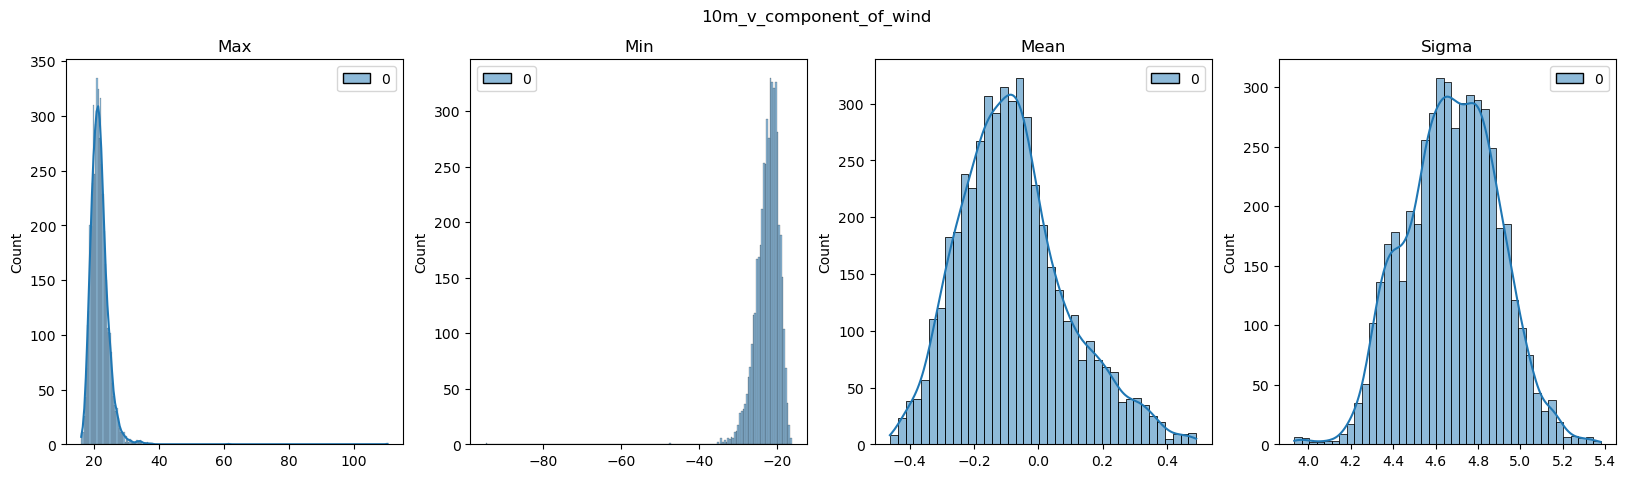

10m_v_component_of_wind


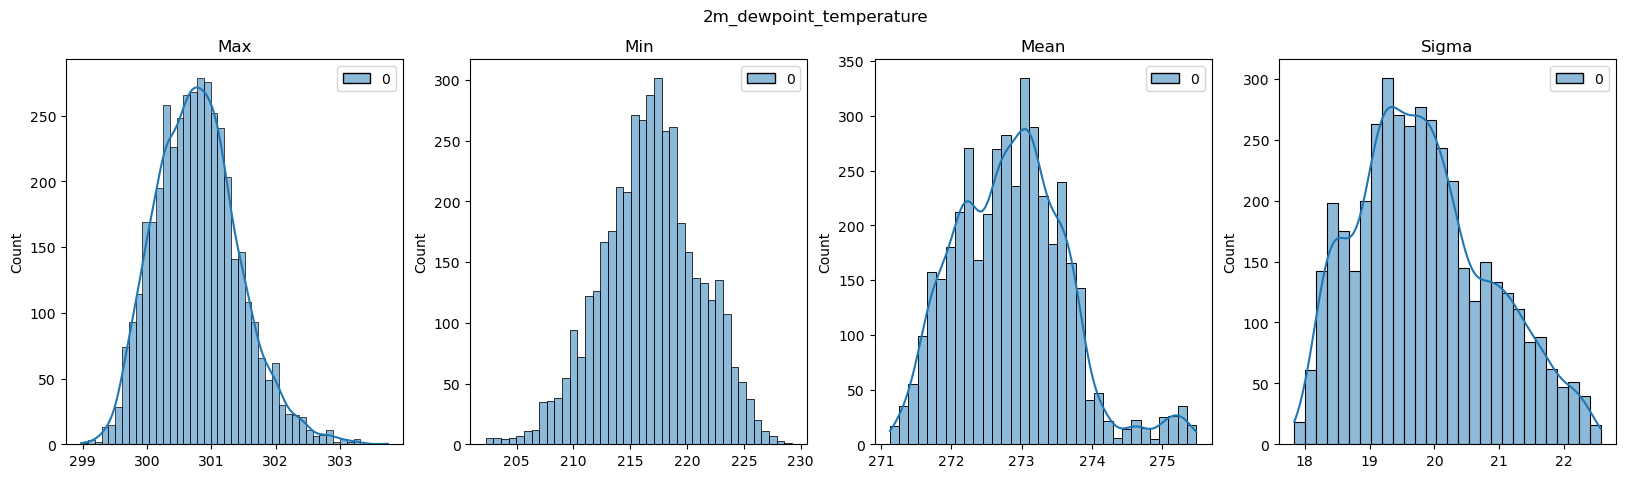

2m_dewpoint_temperature


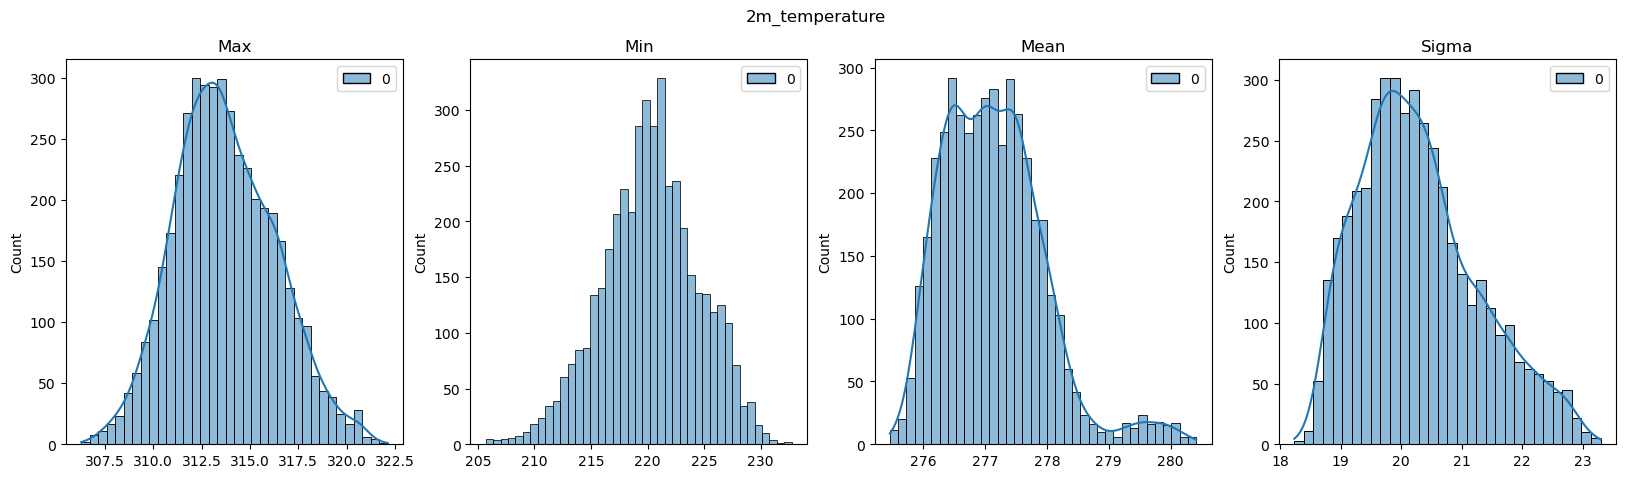

2m_temperature


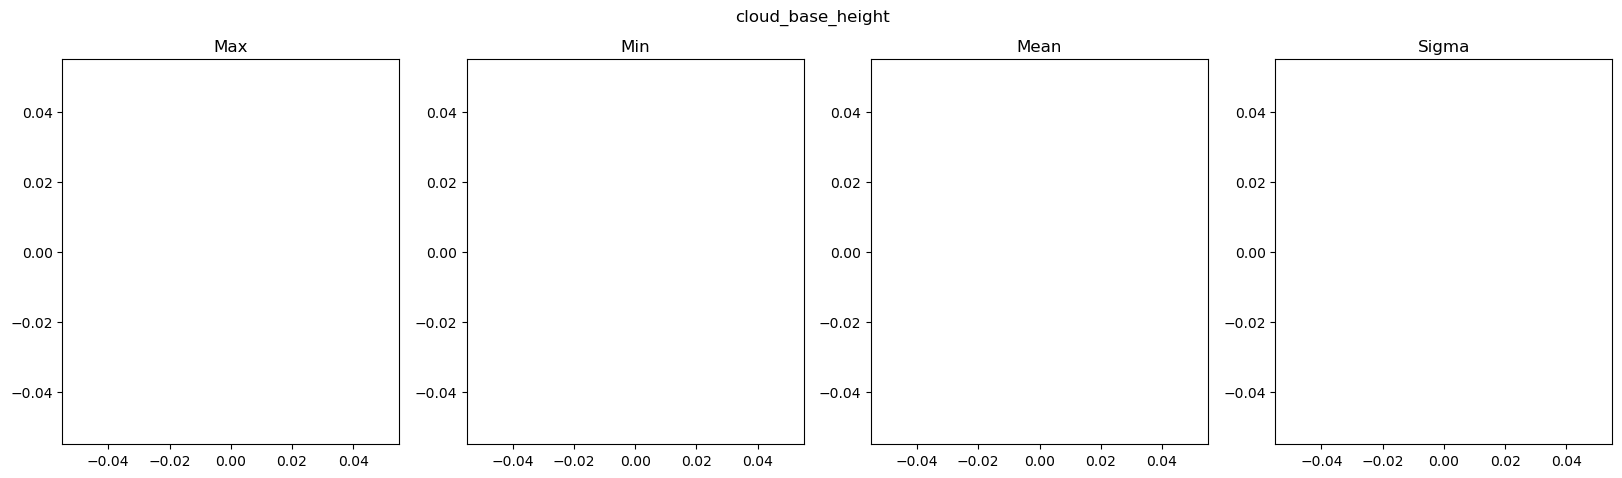

cloud_base_height


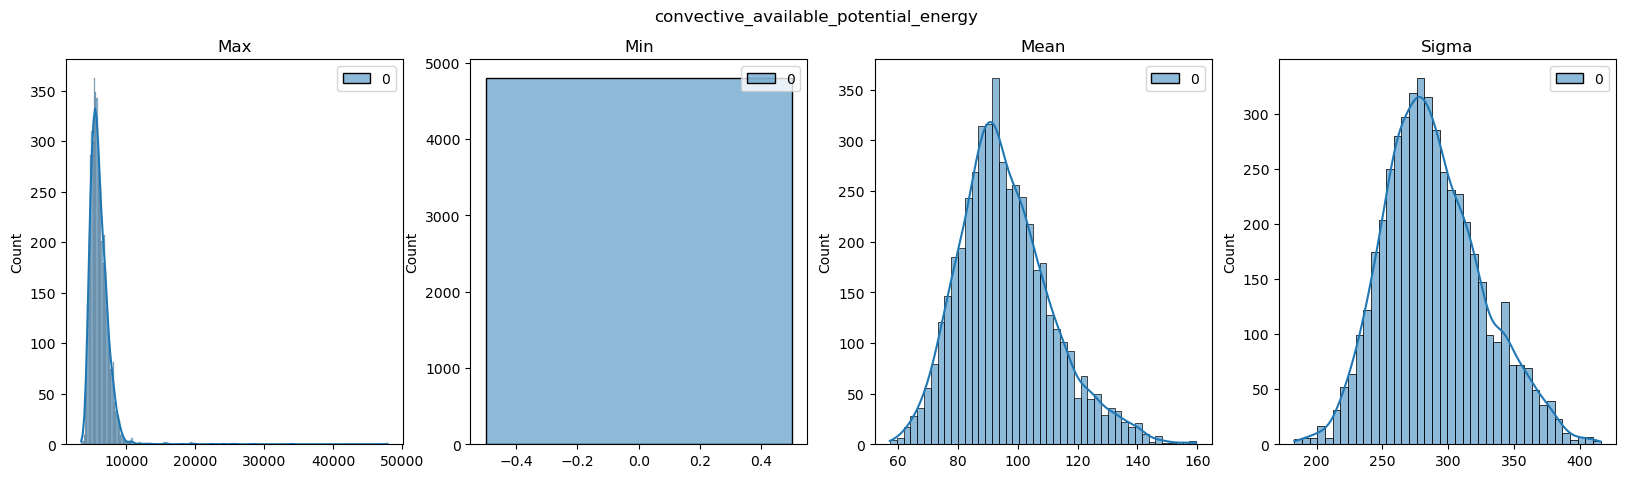

convective_available_potential_energy


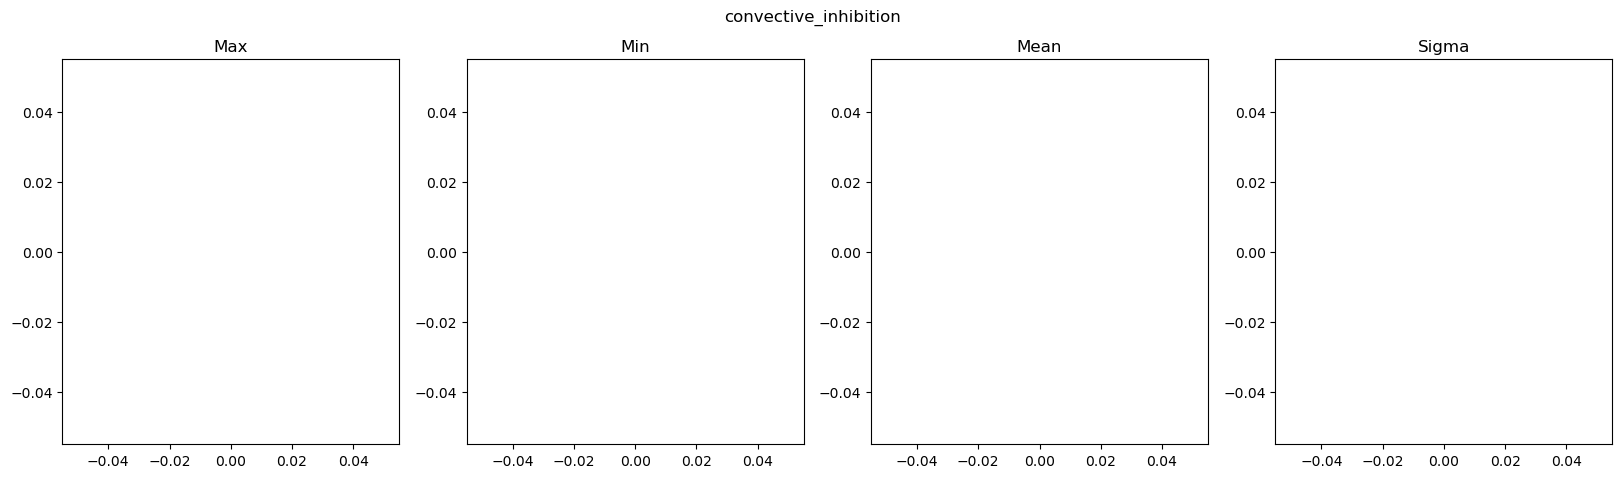

convective_inhibition


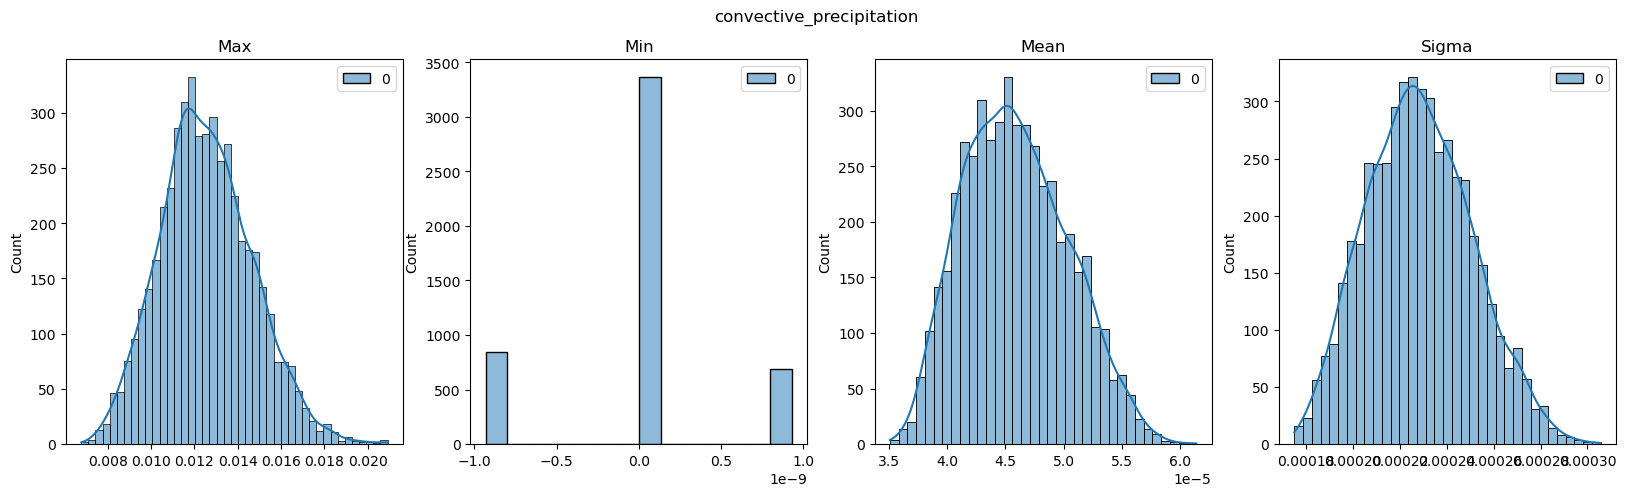

convective_precipitation


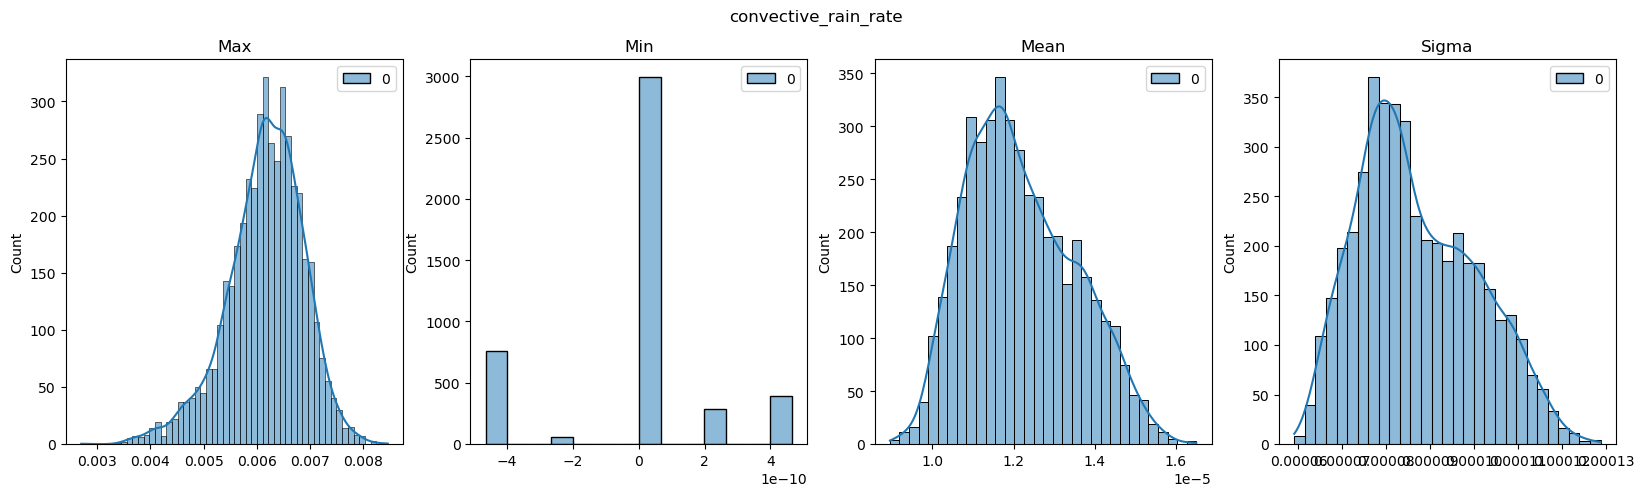

convective_rain_rate


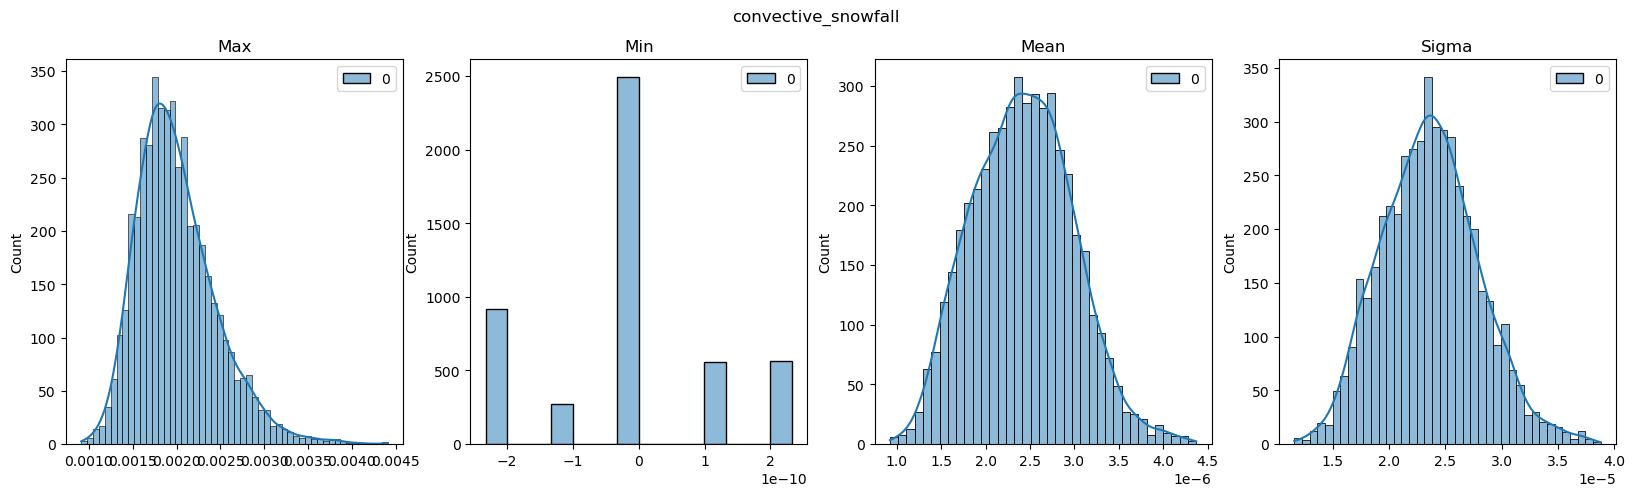

convective_snowfall


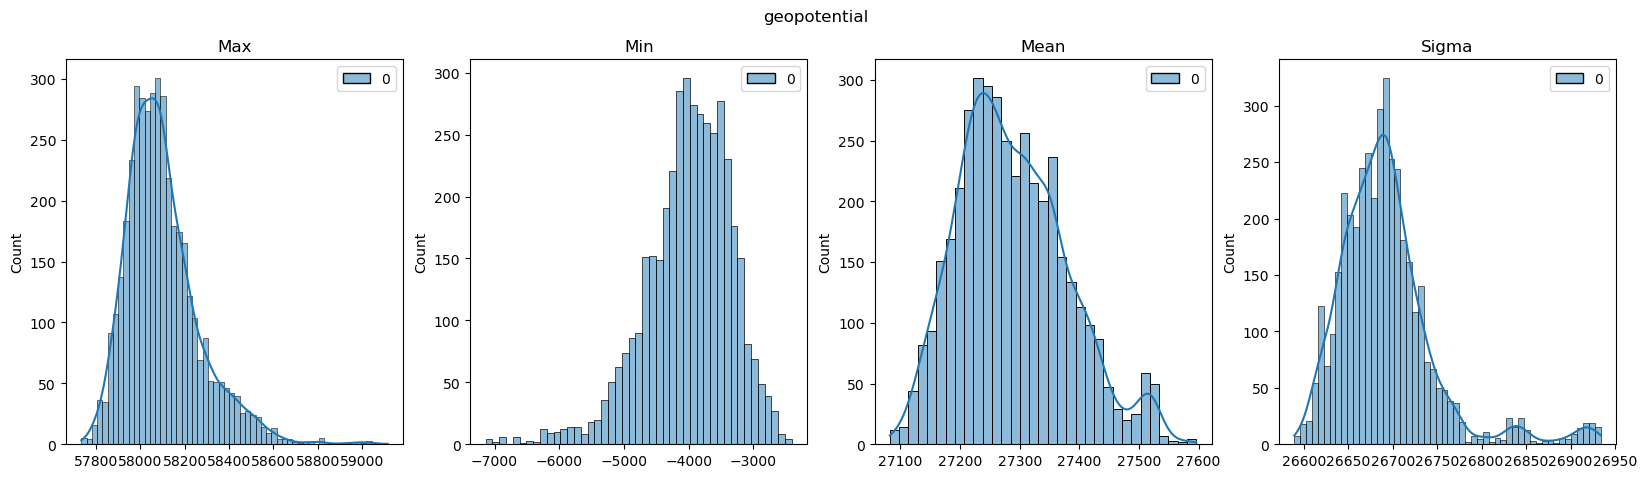

geopotential


LinAlgError: The data appears to lie in a lower-dimensional subspace of the space in which it is expressed. This has resulted in a singular data covariance matrix, which cannot be treated using the algorithms implemented in `gaussian_kde`. Consider performing principle component analysis / dimensionality reduction and using `gaussian_kde` with the transformed data.

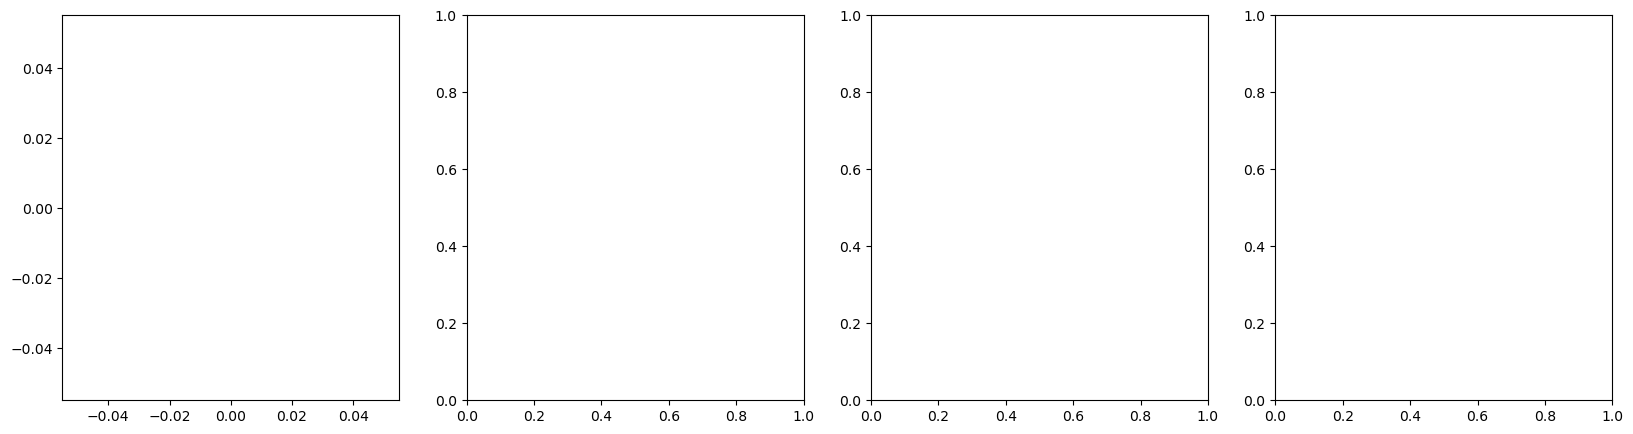

In [24]:
# plot the normality of the data
import matplotlib.pyplot as plt
import seaborn as sns

for i in range(0, len(name_of_variables)):
    fig, ax = plt.subplots(1, 4, figsize=(20, 5))
    sns.histplot(locals()[f'max_{name_of_variables.iloc[i, 0]}'], kde=True, ax=ax[0])
    ax[0].set_title('Max')
    sns.histplot(locals()[f'min_{name_of_variables.iloc[i, 0]}'], kde=False, ax=ax[1])
    ax[1].set_title('Min')
    sns.histplot(locals()[f'mean_{name_of_variables.iloc[i, 0]}'], kde=True, ax=ax[2])
    ax[2].set_title('Mean')
    sns.histplot(locals()[f'sigma_{name_of_variables.iloc[i, 0]}'], kde=True, ax=ax[3])
    ax[3].set_title('Sigma')
    plt.suptitle(name_of_variables.iloc[i, 0])
    plt.show()
    print(name_of_variables.iloc[i, 0])

In [25]:
# check the normality of the data

from scipy.stats import shapiro

for i in range(0, len(name_of_variables)):
    print(name_of_variables.iloc[i, 0])
    print('max')
    print(shapiro(locals()[f'max_{name_of_variables.iloc[i, 0]}']))
    print('min')
    print(shapiro(locals()[f'min_{name_of_variables.iloc[i, 0]}']))
    print('mean')
    print(shapiro(locals()[f'mean_{name_of_variables.iloc[i, 0]}']))
    print('sigma')
    print(shapiro(locals()[f'sigma_{name_of_variables.iloc[i, 0]}']))

10m_u_component_of_wind
max
ShapiroResult(statistic=0.96738600730896, pvalue=3.1139334358932338e-30)
min
ShapiroResult(statistic=0.9084442853927612, pvalue=2.802596928649634e-45)
mean
ShapiroResult(statistic=0.9972555637359619, pvalue=4.779065534421534e-07)
sigma
ShapiroResult(statistic=0.9924252033233643, pvalue=2.140156982026204e-14)
10m_v_component_of_wind
max
ShapiroResult(statistic=0.7777745723724365, pvalue=0.0)
min
ShapiroResult(statistic=0.8806501030921936, pvalue=0.0)
mean
ShapiroResult(statistic=0.9772725105285645, pvalue=3.4315695896146895e-27)
sigma
ShapiroResult(statistic=0.9970676898956299, pvalue=3.980179741347456e-08)
2m_dewpoint_temperature
max
ShapiroResult(statistic=0.9880288243293762, pvalue=2.088016658296421e-18)
min
ShapiroResult(statistic=0.9971792697906494, pvalue=4.746518698084401e-07)
mean
ShapiroResult(statistic=0.9752785563468933, pvalue=2.1368685771042145e-26)
sigma
ShapiroResult(statistic=0.9747616648674011, pvalue=1.2000085838231945e-26)
2m_temperature
ma

ValueError: Data must be at least length 3.

In [26]:
# normalize the data
from sklearn.preprocessing import StandardScaler

for i in range(0, len(name_of_variables)):
    scaler = StandardScaler()
    locals()[f'max_{name_of_variables.iloc[i, 0]}'] = scaler.fit_transform(locals()[f'max_{name_of_variables.iloc[i, 0]}'])
    locals()[f'min_{name_of_variables.iloc[i, 0]}'] = scaler.fit_transform(locals()[f'min_{name_of_variables.iloc[i, 0]}'])
    locals()[f'mean_{name_of_variables.iloc[i, 0]}'] = scaler.fit_transform(locals()[f'mean_{name_of_variables.iloc[i, 0]}'])
    locals()[f'sigma_{name_of_variables.iloc[i, 0]}'] = scaler.fit_transform(locals()[f'sigma_{name_of_variables.iloc[i, 0]}'])

# plot the normality of the data
    
for i in range(0, len(name_of_variables)):
    fig, ax = plt.subplots(1, 4, figsize=(20, 5))
    sns.histplot(locals()[f'max_{name_of_variables.iloc[i, 0]}'], kde=True, ax=ax[0])
    ax[0].set_title('Max')
    sns.histplot(locals()[f'min_{name_of_variables.iloc[i, 0]}'], kde=False, ax=ax[1])
    ax[1].set_title('Min')
    sns.histplot(locals()[f'mean_{name_of_variables.iloc[i, 0]}'], kde=True, ax=ax[2])
    ax[2].set_title('Mean')
    sns.histplot(locals()[f'sigma_{name_of_variables.iloc[i, 0]}'], kde=True, ax=ax[3])
    ax[3].set_title('Sigma')
    plt.suptitle(name_of_variables.iloc[i, 0])
    plt.show()
    print(name_of_variables.iloc[i, 0])

ValueError: Found array with 0 sample(s) (shape=(0, 1)) while a minimum of 1 is required by StandardScaler.

In [29]:
# normality test

for i in range(0, len(name_of_variables)):
    print(name_of_variables.iloc[i, 0])
    print('max')
    print(shapiro(locals()[f'max_{name_of_variables.iloc[i, 0]}']))
    print('min')
    print(shapiro(locals()[f'min_{name_of_variables.iloc[i, 0]}']))
    print('mean')
    print(shapiro(locals()[f'mean_{name_of_variables.iloc[i, 0]}']))
    print('sigma')
    print(shapiro(locals()[f'sigma_{name_of_variables.iloc[i, 0]}']))

# one-way ANOVA test 

10m_u_component_of_wind
max
ShapiroResult(statistic=0.9762762784957886, pvalue=5.951098501100205e-05)
min
ShapiroResult(statistic=0.984221339225769, pvalue=0.001926604425534606)
mean
ShapiroResult(statistic=0.9620680809020996, pvalue=3.694845815971348e-07)
sigma
ShapiroResult(statistic=0.9572868943214417, pvalue=8.486613722880065e-08)
10m_v_component_of_wind
max
ShapiroResult(statistic=0.9779300093650818, pvalue=0.00011736815213225782)
min
ShapiroResult(statistic=0.9727162718772888, pvalue=1.479236289014807e-05)
mean
ShapiroResult(statistic=0.9909330010414124, pvalue=0.05611671134829521)
sigma
ShapiroResult(statistic=0.9754440784454346, pvalue=4.2624702473403886e-05)
2m_dewpoint_temperature
max
ShapiroResult(statistic=0.9297729730606079, pvalue=7.869679213845515e-11)
min
ShapiroResult(statistic=0.9194166660308838, pvalue=9.009488467770499e-12)
mean
ShapiroResult(statistic=0.9222328662872314, pvalue=1.593571281877093e-11)
sigma
ShapiroResult(statistic=0.9209288358688354, pvalue=1.221696

/Users/fabienaugsburger/anaconda3/envs/master/lib/python3.11/site-packages/scipy/stats/_morestats.py:1879: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


KeyError: 0